# Import Modul- Modul yang akan digunakan

In [6]:
import pandas as pd
import pandas_datareader
import datetime as dt
from matplotlib import style
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import style
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Collecting Data

Generate data dari web Yahoo finance dengan menggunakan modul pandas_datareader untuk memperoleh data saham dari Bank-Bank di Indonesia 

Bank Mandiri (BMRI.JK)

In [7]:
def generate_data(index_saham, start, end):
    data_all = pandas_datareader.data.DataReader(index_saham, 'yahoo', start,end)
    data_all.reset_index(inplace=True)
    y_mandiri = data_all.Close
    return y_mandiri, data_all
start_date = dt.datetime(2010, 12, 31)
end_date = dt.datetime(2019, 11, 13)
y_mandiri, data_all = generate_data('BMRI.JK', start_date, end_date)

Bank BRI (BBRI.JK)

In [8]:
def generate_data(index_saham, start, end):
    data_all1 = pandas_datareader.data.DataReader(index_saham, 'yahoo', start,end)
    data_all1.reset_index(inplace=True)
    y_bri = data_all1.Close
    return y_bri, data_all1
start_date = dt.datetime(2010, 12, 31)
end_date = dt.datetime(2019, 11, 13)
y_bri, data_all1 = generate_data('BBRI.JK', start_date, end_date)

Bank BNI (BBNI.JK)

In [9]:
def generate_data(index_saham, start, end):
    data_all2 = pandas_datareader.data.DataReader(index_saham, 'yahoo', start,end)
    data_all2.reset_index(inplace=True)
    y_bni = data_all2.Close
    return y_bni, data_all2
start_date = dt.datetime(2010, 12, 31)
end_date = dt.datetime(2019, 11, 13)
y_bni, data_all2 = generate_data('BBNI.JK', start_date, end_date)

Bank BCA (BBCA.JK)

In [10]:
def generate_data(index_saham, start, end):
    data_all3 = pandas_datareader.data.DataReader(index_saham, 'yahoo', start,end)
    data_all3.reset_index(inplace=True)
    y_bca = data_all3.Close
    return y_bca, data_all3
start_date = dt.datetime(2010, 12, 31)
end_date = dt.datetime(2019, 11, 13)
y_bca, data_all3 = generate_data('BBCA.JK', start_date, end_date)

Bank Mega (MEGA.JK)

In [11]:
def generate_data(index_saham, start, end):
    data_all4 = pandas_datareader.data.DataReader(index_saham, 'yahoo', start,end)
    data_all4.reset_index(inplace=True)
    y_mega = data_all4.Close
    return y_mega, data_all4
start_date = dt.datetime(2010, 12, 31)
end_date = dt.datetime(2019, 11, 13)
y_mega, data_all4 = generate_data('MEGA.JK', start_date, end_date)

Bank Danamon (BDMN.JK)

In [12]:
def generate_data(index_saham, start, end):
    data_all5 = pandas_datareader.data.DataReader(index_saham, 'yahoo', start,end)
    data_all5.reset_index(inplace=True)
    y_dmn = data_all5.Close
    return y_dmn, data_all5
start_date = dt.datetime(2010, 12, 31)
end_date = dt.datetime(2019, 11, 13)
y_dmn, data_all5 = generate_data('BDMN.JK', start_date, end_date)

In [13]:
data_all

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-01-03,3269.479980,3121.989990,3171.149902,3171.149902,47575341.0,2244.793945
1,2011-01-04,3269.479980,3146.570068,3244.899902,3244.899902,55139639.0,2296.999756
2,2011-01-05,3392.399902,3220.320068,3367.810059,3367.810059,76202311.0,2384.005371
3,2011-01-06,3392.399902,3244.899902,3294.070068,3294.070068,76462658.0,2331.806641
4,2011-01-07,3318.649902,3097.409912,3146.570068,3146.570068,108359219.0,2227.393799
...,...,...,...,...,...,...,...
2202,2019-11-08,7150.000000,6850.000000,6975.000000,7100.000000,38177500.0,7100.000000
2203,2019-11-11,7100.000000,6975.000000,7075.000000,7050.000000,22606000.0,7050.000000
2204,2019-11-12,7100.000000,6925.000000,7000.000000,7025.000000,26450400.0,7025.000000
2205,2019-11-13,7000.000000,6775.000000,7000.000000,6875.000000,37574200.0,6875.000000


Perhatikan data yang ditampilkan, ada beberapa data yang tidak diperoleh yaitu data harga saham pada hari libur dan weekend. Hal ini terjadi karena hari tersebut merupakan hari libur bagi para pegawai yang bekerja pada bisnis jual beli saham tersebut. Meskipun sudah ada teknologi komputer, internet dan sebagainya, namun masih banyak hal yang tidak dapat dilakukan oleh teknologi komputer dkk dan hanya dapat dilakukan oleh manusia.

Data yang diperoleh akan bebentuk pandas dataframe dengan masing-masing kolom sebagai berikut
1. Date adalah keterangan tanggal pada data saham
2. High adalah harga tertinggi dari sebuah saham
3. Low adalah harga terrendah dari sebuah saham
4. Open adalah harga saham untuk transaksi pertama yg dilakukan
5. Close adalah harga penutupan dari saham
6. Volume adalah jumlah saham yang dijual, atau diperdagangkan
7. Adj Close adalah harga penutupan saham setelah dilakukan penyesuaian dari aksi korporasi atau corporate action yang dilakukan oleh perusahaan

Pada kesempatan ini yang akan dimodelkan adalah data dari variable 'Close'
selanjutnya nilai-nilai 'Close' dari setiap bank digabungkan kedalam satu dataframe menggunakan fungsi Concat


In [14]:
gabung=[y_mandiri,y_bri,y_bni,y_bca,y_mega,y_dmn]
a=pd.concat(gabung, axis=1, join='inner')

Mengganti nama Kolom sesuai dengan nama masing-masing Bank

In [15]:
a.columns=['Mandiri', 'BRI','BNI','BCA','MEGA','Danamon']


In [16]:
tgl=data_all[:2206]['Date']

Set date sebagai index

In [17]:
aa=a.set_index(tgl)

# Visualizing

Kemudian Plotkan

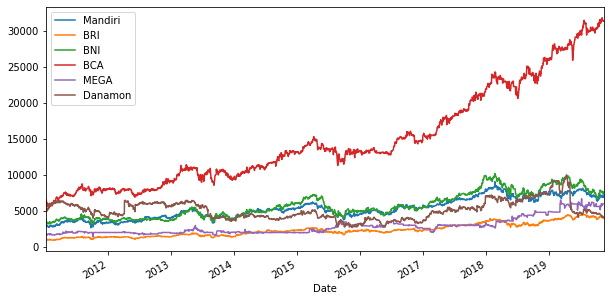

In [18]:
ax = aa.plot(kind='line',figsize=(10,5));
#style.use('dark_background')
plt.show();

<IPython.core.display.Javascript object>


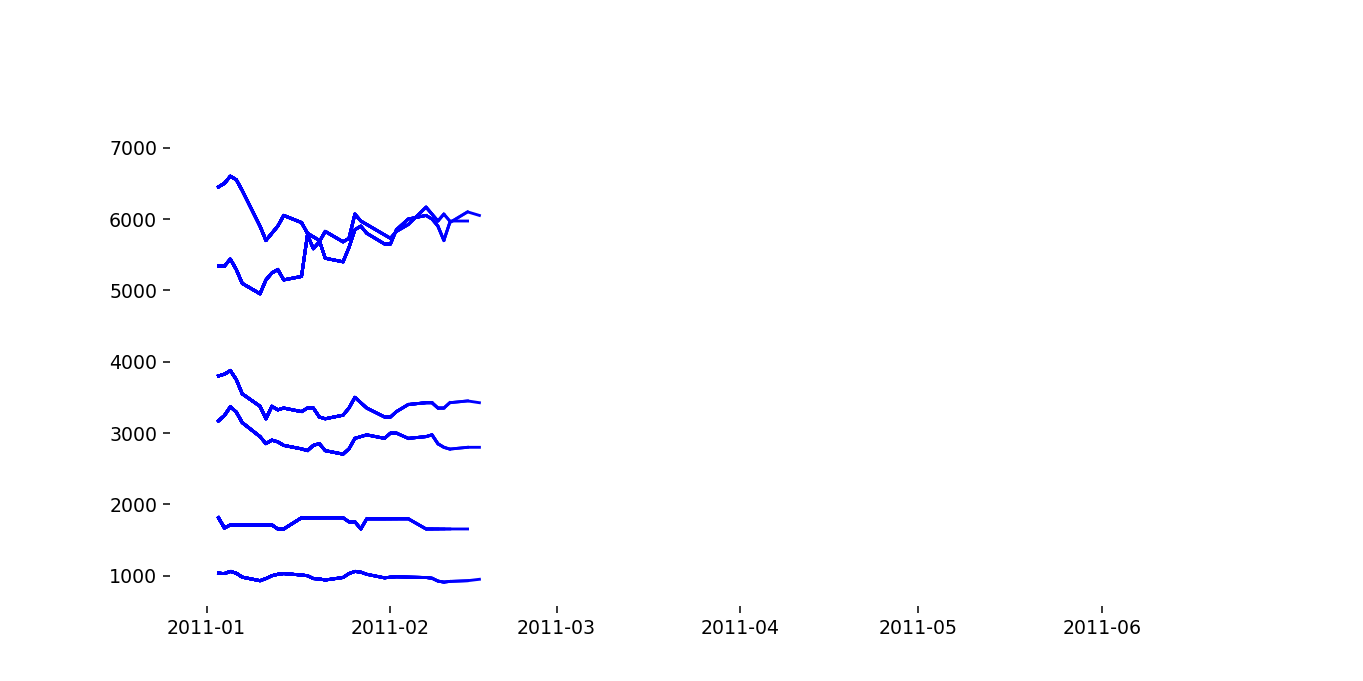

No handles with labels found to put in legend.


In [19]:
%matplotlib notebook
plt.rcParams['animation.html']='jshtml'
fig=plt.figure(figsize=(10,5))
#ax=fig
ax=fig.add_subplot(111)
#ay=fig.add_subplot(212)
plt.legend(loc="best")
fig.show()

Tampak bahwa Ke enam Bank memiliki plot yang berpola naik turun yang sama, sehingga pada kesempatan ini kami akan mencoba untuk melakukan analisis regresi pada harga saham Bank Mandiri

In [20]:
n=2000
x,y,z=[],[],[]
a=tgl
b=aa[['Mandiri','BRI','BNI','BCA','MEGA','Danamon']].to_numpy()
# c=aa['BRI']
for i in range(n):
    x.append(a[i])
#     y.append(b[i])
#     z.append(c[i])
    y.append(b[i])
    ax.plot(x,y, color='b')
   # ay.plot(x,z, color='g')
    fig.canvas.draw()
    time.sleep(0.00000001)
    i +=1
x=[]
y=[]

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


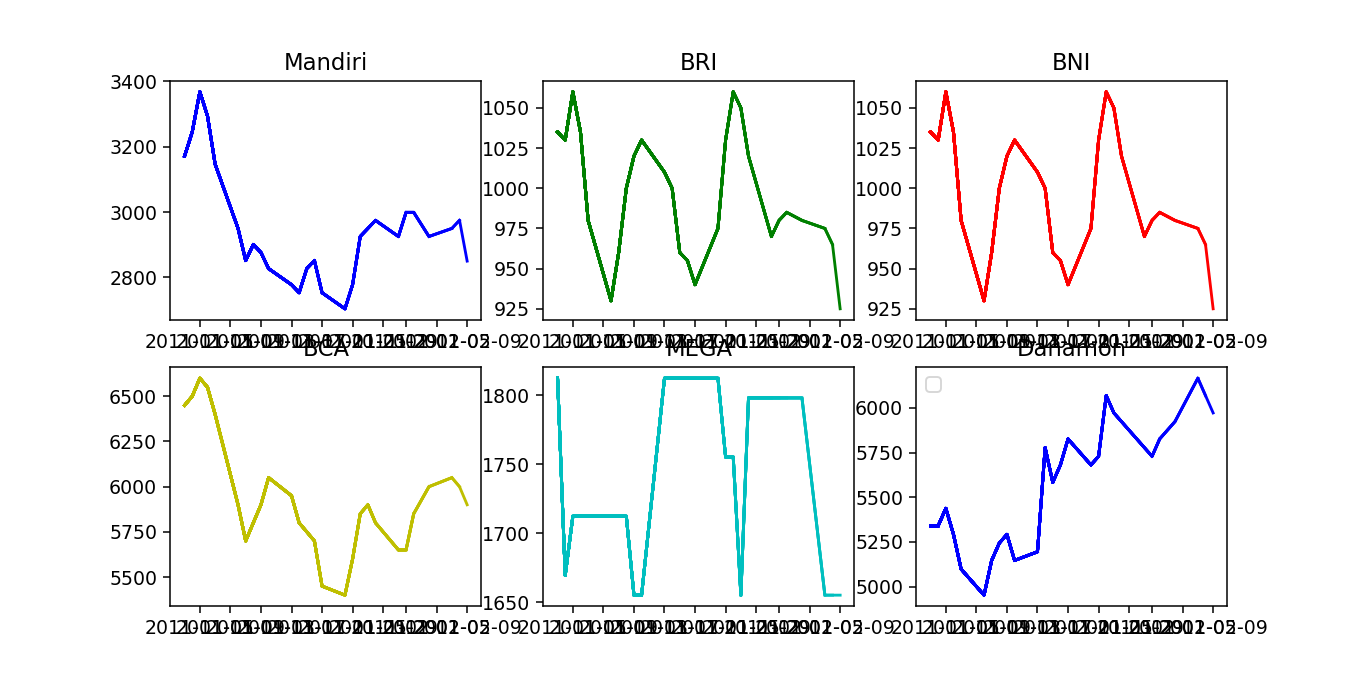

No handles with labels found to put in legend.


In [21]:
%matplotlib notebook
plt.rcParams['animation.html']='jshtml'
fig=plt.figure(figsize=(10,5))
#ax=fig
au=fig.add_subplot(231)
av=fig.add_subplot(232)
aw=fig.add_subplot(233)
ax=fig.add_subplot(234)
ay=fig.add_subplot(235)
az=fig.add_subplot(236)
au.set_title('Mandiri')
av.set_title('BRI')
aw.set_title('BNI')
ax.set_title('BCA')
ay.set_title('MEGA')
az.set_title('Danamon')
plt.legend(loc="best")
fig.show()

In [22]:
n=2000
x,y,z,w,u,v,t=[],[],[],[],[],[],[]
a=tgl
b=aa['Mandiri']
c=aa['BRI']
d=aa['BNI']
e=aa['BCA']
f=aa['MEGA']
g=aa['Danamon']
for i in range(n):
    t.append(a[i])
    u.append(b[i])
    v.append(c[i])
    w.append(d[i])
    x.append(e[i])
    y.append(f[i])
    z.append(g[i])
    au.plot(t,u, color='b')
    av.plot(t,v, color='g')
    aw.plot(t,v, color='r')
    ax.plot(t,x, color='y')
    ay.plot(t,y,color='c')
    az.plot(t,z,color='b')
    fig.canvas.draw()
    time.sleep(0.00000001)
    i +=1
x,y,z,w,u,v,t=[],[],[],[],[],[],[]


KeyboardInterrupt: 

In [44]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data_all['Date'],
                open=data_all['Open'], high=data_all['High'],
                low=data_all['Low'], close=data_all['Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# Modeling Data

Memilih Nilai  Close dari data Bank Mandiri

In [24]:
y=pd.DataFrame(data_all[['Close']])
y

,Close
0,3171.149902
1,3244.899902
2,3367.810059
3,3294.070068
4,3146.570068
...,...
2202,7100.000000
2203,7050.000000
2204,7025.000000
2205,6875.000000


Membaca nilai Suku Bunga JIBOR BI yang di peroleh dari website BI


In [25]:
suku=pd.read_excel('Suku Bunga JIBOR BI 2011-2019.xlsx')
suku

,Tanggal,Suku Bunga JIBOR BI
0,2011-01-03,5.84588
1,2011-01-04,5.81765
2,2011-01-05,5.81647
3,2011-01-06,5.79529
4,2011-01-07,5.79412
...,...,...
2397,2019-11-08,5.07365
2398,2019-11-09,0.00000
2399,2019-11-11,5.07077
2400,2019-11-12,5.06513


Menghapus Nilai bernilai nol yakni nilai pada hari sabtu, kemudian me-reset index dataframenya


In [26]:
delete_row = suku[suku["Suku Bunga JIBOR BI"]==0].index
suku = suku.drop(delete_row)
a=suku.reset_index()
suku1=a.drop(columns='index')
suku1

,Tanggal,Suku Bunga JIBOR BI
0,2011-01-03,5.84588
1,2011-01-04,5.81765
2,2011-01-05,5.81647
3,2011-01-06,5.79529
4,2011-01-07,5.79412
...,...,...
2170,2019-11-07,5.08231
2171,2019-11-08,5.07365
2172,2019-11-11,5.07077
2173,2019-11-12,5.06513


Membaca file Kurs Transaksi BI yang diperoleh dari website BI


In [27]:
kurs=pd.read_excel('Kurs Transaksi BI.xlsx',sheet_name='Sheet1')
kurs1=kurs[['KURS JUAL','KURS BELI']]

Memeriksa bari yang memuat nilai null

In [28]:
kurs1[kurs1.isnull().any(axis=1)]

,KURS JUAL,KURS BELI
892,NaN,NaN
1136,NaN,NaN
1380,NaN,NaN
1623,NaN,NaN
1866,NaN,NaN


menghitung mean dari kolom

In [29]:
kurs1[["KURS JUAL","KURS BELI"]].mean()

KURS JUAL    12.132986
KURS BELI    12.012211
dtype: float64

me-replace nilai null dengan nilai mean yang dperoleh seblumnya

In [30]:
kurs2= kurs1.fillna({"KURS JUAL": 12.131,"KURS BELI": 12.010})
kurs3=kurs2[:2174]

Kemudian di gabungkan dan periksa kembali apakah masih ada nilai null

In [31]:
gabung=[y,kurs3,suku1]
b=pd.concat(gabung, axis=1, join='inner')
b[b.isnull().any(axis=1)]

,Close,KURS JUAL,KURS BELI,Tanggal,Suku Bunga JIBOR BI


Menentukan Var Respon(Y)

In [32]:
y=b[['Tanggal','Close']]
ym=y[1:2175]

Menentukan Var Predictor(X)

In [33]:
x=b[['KURS BELI','Suku Bunga JIBOR BI','Tanggal']]
xm=x[:2173]

## Model Regresi Linear Berganda

Dalam mengkaji hubungan antara beberapa variabel menggunakan analisis regresi, terlebih dahulu peneliti menentukan satu variabel yang disebut dengan variabel tidak bebas dan satu atau lebih variabel bebas. Jika ingin dikaji hubungan atau pengaruh satu variabel bebas terhadap variabel tidak bebas, maka model regresi yang digunakan adalah model regresi linier sederhana. Kemudian Jika ingin dikaji hubungan atau pengaruh dua atau lebih variabel bebas terhadap variabel tidak bebas, maka model regresi yang digunakan adalah model regresi linier berganda (multiple linear regression model). Kemudian untuk mendapatkan model regresi linier sederhana maupun model regresi linier berganda dapat diperoleh dengan melakukan estimasi terhadap parameter-parameternya menggunakan metode tertentu. 
Bentuk umum model regresi linier berganda dengan p variabel bebas adalah seperti berikut

#Y_i= β_o+β_1 x_i1+⋯+β_p x_ip+ε_i,i=1,2,3,…,n 

#Yi = variabel dependen pada pengamatan ke-i, untuk i =1, 2,..., n 
#Xij = variabel independen pada pengamatan ke-i dan parameter ke-p
#β_j= parameter regresi yang tidak diketahui nilainya dan akan dicari nilai estimasinya.
#ε_i = sisa (error) untuk pengamatan ke-i yang diasumsikan berdistribusi normal yang salingbebas dan identik dengan rata-rata 0 (nol) dan variansi σ^2.


Pemodelan Regresi linear berganda dapat dilakukan menggunakan modul SKLEARN

In [34]:
X=xm[['KURS BELI','Suku Bunga JIBOR BI']]
Y=ym[['Close']]
#type(X)
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-188.57219451]
Coefficients: 
 [[ 623.57901923 -370.624074  ]]


Inteprtasi Model
y = -188.57 + 623.58(Kurs Beli) - 370.62(Suku Bunga)
- Intercept menunjukkan pengaruh dari factor lain selain dari var predictor
- Koef Kurs beli menunjukkan bahwa kenaikan Kurs beli sebsar 1 satuan(ribu) akan menaikkan Close Harga saham Sebesar Rp. 623.58
- Koef Suku Bunga menunjukkan bahwa kenaiakn suku bungan 1% akan menurukan Close Harga saham sebsar Rp. 370.63

Menghitung Nilai MAE, MSE, R-squared dari Model

In [35]:
x1 = np.asanyarray(X)
y1 = np.asanyarray(Y)
y_ = regr.predict(x1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_ - y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_ - y1) ** 2))
print("R2-score: %.2f" % r2_score(y1 , y_))

Mean absolute error: 654.99
Residual sum of squares (MSE): 676044.24
R2-score: 0.68


Memplotkan nilai Y hasil prediksi dari model dengan nilai Y aktual

<IPython.core.display.Javascript object>


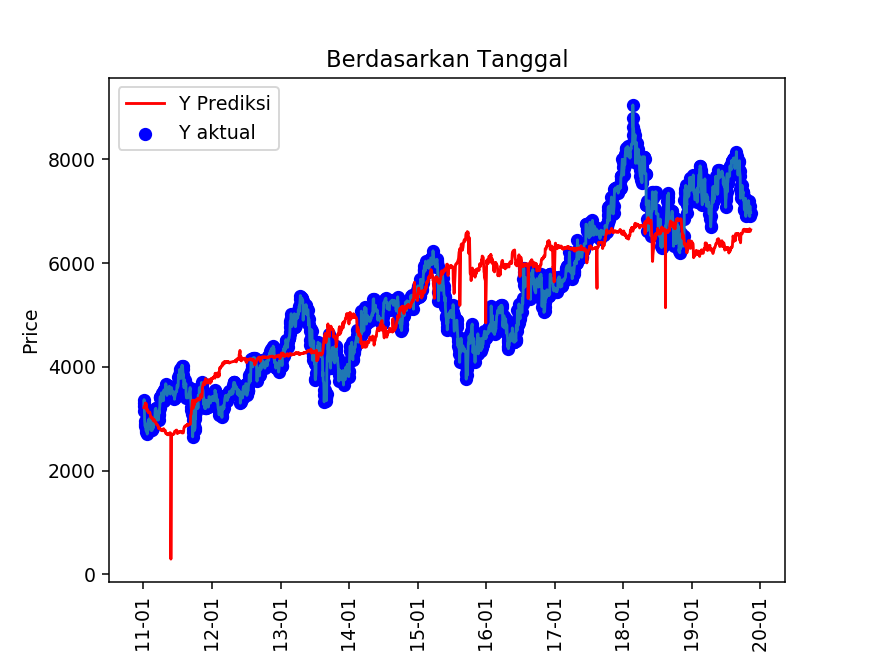

In [36]:
def plot(y_, X):
    fig, axx = plt.subplots()
    plt.plot(xm.Tanggal, Y)
    monthyearFmt = mdates.DateFormatter('%Y-%m')
    axx.xaxis.set_major_formatter(monthyearFmt)
    _ = plt.xticks(rotation=90)
    plt.plot(xm.Tanggal, y_, c='r', label='Y Prediksi')
    plt.scatter(xm.Tanggal, Y, c='b', label='Y aktual')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Berdasarkan Tanggal')
    plt.legend()
    plt.show()
plot(y_, xm)

# Model dengan metode SVR

Support Vector Regression (SVR) adalah salah satu metode regresi dengan menggunakan machine learning yang sangat populer. Konsep dari SVR adalah membuat sebuah hyperplane yang mendekati titik -titik data yang akan diprediksi, sehingga diperoleh estimasi yang memiliki nilai error yang sangat kecil.

SVR dapat melakukan regresi linear dan non-linear. Namun pada pembahasan kali ini, saya hanya melakukan SVR dengan menggunakan fungsi kernel Radial Basis Support (RBF). 

Sebelum melakukan analisis SVR perlu dilakukan transformasi data pada data X. Transformasi dilakukan dengan cara

In [37]:
def tranformasi_data(X, xm_tr):
    scaler = StandardScaler()
    scaler.fit(X)
    Xm_all_tr = scaler.transform(xm_tr)
    return Xm_all_tr
Xm_all_tr = tranformasi_data(X, X)

Diperoleh 

In [38]:
Xm_all_tr

array([[-1.53831496,  0.42747916],
       [-1.53831496,  0.39623257],
       [-1.53281666,  0.39492648],
       ...,
       [ 0.97583058, -0.41768405],
       [ 0.9564316 , -0.42726944],
       [ 0.98030419, -0.43045719]])

Setelah itu dilakukan penentuan parameter terbaik pada SVR dengan kernel RBF. Disini saya menggunakan beberapa nilai gamma dari 5 hingga 10.

In [39]:
def model(Xm_all_tr, Y):
    gcs = GridSearchCV(SVR(kernel='rbf'),
                       param_grid={'gamma': [30,31,32,35]},
                       cv=5,
                       scoring='neg_mean_squared_error')
    grid_result = gcs.fit(Xm_all_tr, Y)
    best_params = grid_result.best_params_
    best_svr = SVR(kernel='rbf', C=1e3, gamma=best_params["gamma"])
    best_svr.fit(Xm_all_tr, Y)
    y_pred = best_svr.predict(Xm_all_tr)
    return y_pred, best_svr
y_pred, best_svr = model(Xm_all_tr, Y)

e:\digitalent2\eda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

e:\digitalent2\eda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

e:\digitalent2\eda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

e:\digitalent2\eda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

e:\digitalent2\eda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarn

Jika ingin melihat paremeter terbaik pada model dapat dilakukan dengan cara

In [40]:
best_svr

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=35,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Untuk melihat apakah pembentukan model prediksi yang dibuat sudah mendekati nilai data sebenarnya, dapat dilihat dengan melihat plot hasil prediksi dengan data sebenarnya.

<IPython.core.display.Javascript object>


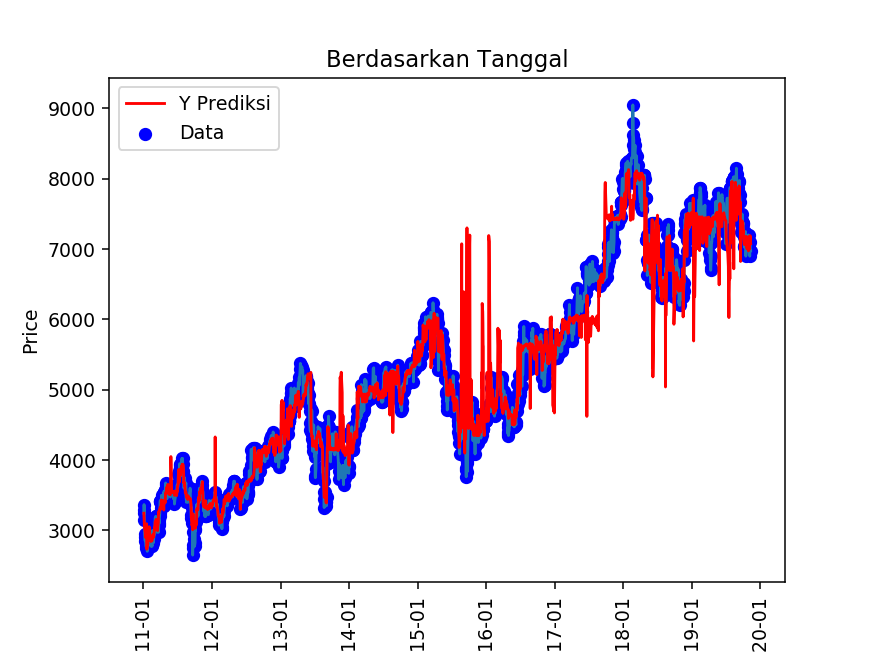

In [41]:
def plot(y_pred, X):
    fig, axx = plt.subplots()
    plt.plot(xm.Tanggal, Y)
    monthyearFmt = mdates.DateFormatter('%Y-%m')
    axx.xaxis.set_major_formatter(monthyearFmt)
    _ = plt.xticks(rotation=90)
    plt.plot(xm.Tanggal, y_pred, c='r', label='Y Prediksi')
    plt.scatter(xm.Tanggal, Y, c='b', label='Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Berdasarkan Tanggal')
    plt.legend()
    plt.show()
plot(y_pred, X)

Jika dilihat dari plot yang dihasilkan dapat dilihat bahwa nilai prediksi sudah mendekati nilai data sebenarnya. Namun untuk memastikan bahwa model ini sudah bagus atau tidak dapat dipastikan dengan melihat Mean Square Error (MSE)dan Mean Ablosute Error(MAE). MSE dan MAE yang kecil dan mendekati nol menandakan bahwa model yang diperoleh sudah bagus.

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MSE: {0:.3f}'.format(mean_squared_error(Y, y_pred)))
print('MAE: {0:.3f}'.format(mean_absolute_error(Y, y_pred)))
print('R^2: {0:.3f}'.format(r2_score(Y, y_pred)))

MSE: 135181.445
MAE: 201.770
R^2: 0.936


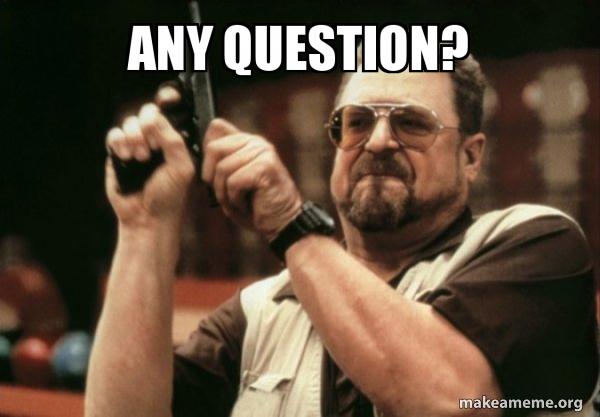

In [43]:
from IPython.display import Image
Image(filename='gambar.jpg')